# Check on Gpu Used

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-aa969158-28e4-068b-5b81-24b2583c6494)


# Get helper Function

In [ ]:
!wget https://raw.githubusercontent.com/es-OmarHani/tensorflow-deep-learning/main/extras/helper_functions.py

from helper_functions import create_tensorboard_callback, plot_loss_curves, compare_historys, unzip_data

--2023-09-18 17:58:51--  https://raw.githubusercontent.com/es-OmarHani/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-09-18 17:58:51 (65.0 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



# Download  Our data from tensorflow datasets

In [ ]:
# import tfds
import tensorflow_datasets as tfds
import tensorflow as tf

# List our datasets avaliable
datasets_list = tfds.list_builders()
datasets_list

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'bucc',
 'c4',
 'c4_wsrs',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cardiotox',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar100_n',
 'cifar10_1',
 'cifar10_corrupted',
 'cifar10_n',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'conll2002',
 'conll2003',
 'controlled_noisy_web_labels'

In [ ]:
# check if food101 is in it or not
'food101' in datasets_list

True

In [ ]:
# Loads our data from tfds
(train_data, test_data), ds_info = tfds.load(name='food101',
                                             split=['train', 'validation'],
                                             shuffle_files = True,
                                             as_supervised = True,
                                             with_info = True)

# Exploring and becoming one with our data

In [ ]:
# Get feautures about our dataset
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [ ]:
# Get class_names
class_names = ds_info.features['label'].names
class_names[:12]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad']

In [ ]:
# Take one sample of our train_data
train_one_sample = train_data.take(1)
train_one_sample, len(train_one_sample)

(<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 1)

In [ ]:
# loop on one sample to show our data
for img, label in train_one_sample:
  print(f"""
img_shape:{img.shape}
img_dtype:{img.dtype}
target_class:{label}
class_name:{class_names[label.numpy()]}
  """)


img_shape:(512, 384, 3)
img_dtype:<dtype: 'uint8'>
target_class:74
class_name:peking_duck
  


In [ ]:
# show img
img[:2]

<tf.Tensor: shape=(2, 384, 3), dtype=uint8, numpy=
array([[[152, 129,  77],
        [160, 137,  85],
        [160, 137,  85],
        ...,
        [ 26,  21,  18],
        [ 24,  19,  16],
        [ 21,  16,  13]],

       [[156, 133,  81],
        [158, 135,  83],
        [155, 132,  80],
        ...,
        [ 25,  20,  17],
        [ 23,  18,  15],
        [ 22,  17,  14]]], dtype=uint8)>

## PLot img


(-0.5, 383.5, 511.5, -0.5)

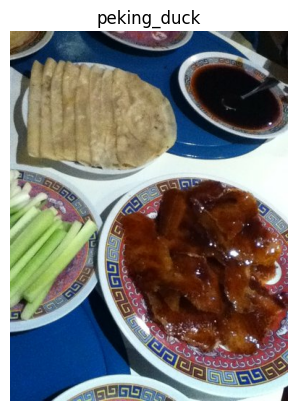

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.title(class_names[label.numpy()])
plt.axis(False)

# Creat Preproccesing function to prepare our data

In [ ]:
# Create func
def preprocess_img(img, label, img_shape = 224):
  """Function for preparing our img with resizing imgs
  and then make dtype to be float32

  Args:
    img: loaded image
    label: label represent class of img
    img_shape: shape of resizing image with

  Return:
    img_cast : image after casting data of it into float32
    label : label represent class of img
  """

  # Resize img
  img = tf.image.resize(img, size=[img_shape, img_shape] )

  # scaling img if needed
  #img = img/255.0

  # casting img
  img_cast = tf.cast(img, dtype=tf.float32)

  return img_cast, label

In [ ]:
# let's preprocess img
img_preprocessed, _ = preprocess_img(img, label)
# img_preprocessed

print(f"image before preprocessed:{img[:2]} \nshape:{img.shape}\ndtype{img.dtype}\n\n")
print(f"image after preprocessed:{img_preprocessed[:2]} \nshape:{img_preprocessed.shape}\ndtype{img_preprocessed.dtype}")

image before preprocessed:[[[152 129  77]
  [160 137  85]
  [160 137  85]
  ...
  [ 26  21  18]
  [ 24  19  16]
  [ 21  16  13]]

 [[156 133  81]
  [158 135  83]
  [155 132  80]
  ...
  [ 25  20  17]
  [ 23  18  15]
  [ 22  17  14]]] 
shape:(512, 384, 3)
dtype<dtype: 'uint8'>


image after preprocessed:[[[156.05103  133.05103   81.05102 ]
  [156.13776  133.13776   81.13776 ]
  [146.31122  123.311226  71.311226]
  ...
  [ 22.454105  17.454105  13.668401]
  [ 25.306135  20.306135  17.306135]
  [ 22.25511   17.25511   14.25511 ]]

 [[159.82652  136.82652   82.82653 ]
  [149.79591  126.79591   72.79591 ]
  [132.69388  109.69388   57.26531 ]
  ...
  [ 24.183672  19.183672  15.397966]
  [ 22.21425   17.21425   14.214251]
  [ 18.83164   14.83164   11.83164 ]]] 
shape:(224, 224, 3)
dtype<dtype: 'float32'>


# Maping our func and make batching for our data

In [ ]:
# train_data maping function for it
train_data = train_data.map(map_func=preprocess_img,
                            num_parallel_calls=tf.data.AUTOTUNE)

# train_data make shuffling and batching and prefetch
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

# test_data maping function for it
test_data = test_data.map(map_func=preprocess_img,
                            num_parallel_calls=tf.data.AUTOTUNE).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
test_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

# Creating model callbacks

In [ ]:
# create tensorboard callback
from helper_functions import create_tensorboard_callback

# create model_ckpt
checkpoint_path = 'model_checkpoint/cp.ckpt'
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                      monitor='val_acc',
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      verbose=0)

# Turning on Mixed precision

In [ ]:
from tensorflow.keras import mixed_precision

# Let's turn on it
mixed_precision.set_global_policy('mixed_float16')

# check on it
mixed_precision.global_policy()

<Policy "mixed_float16">

# Create our first model using mixed precision

In [ ]:
from tensorflow.keras import layers, mixed_precision
from tensorflow.keras.applications import EfficientNetB0

# turn on mixed precision if not turn on as before
mixed_precision.set_global_policy('mixed_float16')

# create base_model
base_model = EfficientNetB0(include_top=False)
base_model.trainable=False

# create our model functional
input_shape=(224, 224, 3)
inputs = layers.Input(shape=input_shape, name="input_layer")
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D(name='avg_pool_layer')(x)
x = layers.Dense(len(class_names))(x)
outputs = layers.Activation('softmax', dtype=tf.float32)(x)

# Create model
model = tf.keras.Model(inputs, outputs)

In [ ]:
label

<tf.Tensor: shape=(), dtype=int64, numpy=74>

In [ ]:
# compile our model
model.compile(loss='sparse_categorical_crossentropy', # label is int so it should be sparse
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# Check is our mdoel uses mixed_precision or not

In [ ]:
model.layers

In [ ]:
# check on our layers in model
for layer in model.layers:
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)


input_layer True float32 <Policy "float32">
efficientnetb0 False float32 <Policy "mixed_float16">
avg_pool_layer True float32 <Policy "mixed_float16">
dense_2 True float32 <Policy "mixed_float16">
activation_1 True float32 <Policy "float32">


# Fitting our first mixed_precision model

In [ ]:
# Turn off all warnings except for errors
tf.get_logger().setLevel('ERROR')

# Fit the model with callbacks
hist_feature_extraction_101_food = model.fit(train_data,
                                                     epochs=3,
                                                     steps_per_epoch=len(train_data),
                                                     validation_data=test_data,
                                                     validation_steps=int(0.15 * len(test_data)),
                                                     callbacks=[create_tensorboard_callback("training_logs",
                                                                                            "efficientnetb0_101_classes_all_data_feature_extract"),
                                                                model_checkpoint])

Saving TensorBoard log files to: training_logs/efficientnetb0_101_classes_all_data_feature_extract/20230918-192502
Epoch 1/3
2368/2368 [==============================] - 234s 97ms/step - loss: 1.0539 - accuracy: 0.7241 - val_loss: 0.9995 - val_accuracy: 0.7280
Epoch 2/3
2368/2368 [==============================] - 226s 94ms/step - loss: 0.9594 - accuracy: 0.7464 - val_loss: 0.9855 - val_accuracy: 0.7322
Epoch 3/3
2368/2368 [==============================] - 246s 102ms/step - loss: 0.8877 - accuracy: 0.7659 - val_loss: 0.9705 - val_accuracy: 0.7356


In [73]:
# Evaluate our model
res_feature_extraction_101_food = model.evaluate(test_data)

790/790 [==============================] - 73s 92ms/step - loss: 0.9705 - accuracy: 0.7356


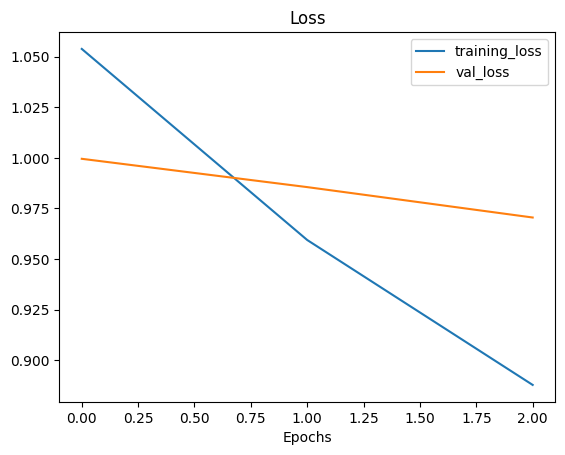

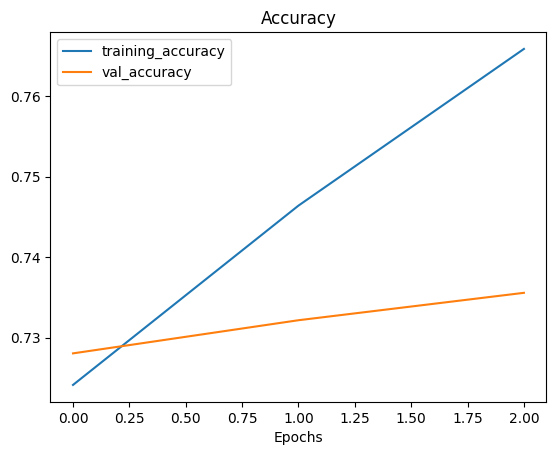

In [92]:
# show loss curves
plot_loss_curves(hist_feature_extraction_101_food)

# Some Additional Exercies :

## Predict our probs

In [74]:
# predict on our model
preds_probs = model.predict(test_data, verbose=1)

790/790 [==============================] - 60s 71ms/step


In [75]:
# check on length of preds_probs
len(preds_probs)

25250

In [78]:
# let's get our predicted classes
pred_classes_nums = preds_probs.argmax(axis=1)
pred_classes_nums[:10]

array([20, 27, 29, 81, 91, 53, 97, 97, 10, 31])

## Unravelling our data to get our labels


In [79]:
test_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [86]:
y_labels = []

for img, label in test_data.unbatch():
  # print(label.numpy())
  y_labels.append(label.numpy())

y_labels[:10]

[65, 70, 34, 69, 23, 78, 13, 41, 27, 41]

## Create classification_report to show individual classes `f1_scores`

In [87]:
from sklearn.metrics import classification_report

print(classification_report(y_true=y_labels,
                            y_pred=pred_classes_nums))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       250
           1       0.01      0.01      0.01       250
           2       0.01      0.01      0.01       250
           3       0.00      0.00      0.00       250
           4       0.03      0.03      0.03       250
           5       0.01      0.01      0.01       250
           6       0.01      0.01      0.01       250
           7       0.01      0.01      0.01       250
           8       0.01      0.01      0.01       250
           9       0.01      0.01      0.01       250
          10       0.00      0.00      0.00       250
          11       0.01      0.01      0.01       250
          12       0.00      0.00      0.00       250
          13       0.01      0.01      0.01       250
          14       0.00      0.00      0.00       250
          15       0.01      0.01      0.01       250
          16       0.01      0.01      0.01       250
          17       0.00    

In [88]:
# Let's make a dict with only f1_score for each class
class_report = classification_report(y_true=y_labels,
                                     y_pred=pred_classes_nums,
                                     output_dict=True)

class_report

{'0': {'precision': 0.004048582995951417,
  'recall': 0.004,
  'f1-score': 0.004024144869215291,
  'support': 250},
 '1': {'precision': 0.011406844106463879,
  'recall': 0.012,
  'f1-score': 0.011695906432748539,
  'support': 250},
 '2': {'precision': 0.011904761904761904,
  'recall': 0.012,
  'f1-score': 0.011952191235059759,
  'support': 250},
 '3': {'precision': 0.003355704697986577,
  'recall': 0.004,
  'f1-score': 0.0036496350364963502,
  'support': 250},
 '4': {'precision': 0.027237354085603113,
  'recall': 0.028,
  'f1-score': 0.027613412228796846,
  'support': 250},
 '5': {'precision': 0.0070921985815602835,
  'recall': 0.008,
  'f1-score': 0.0075187969924812035,
  'support': 250},
 '6': {'precision': 0.011320754716981131,
  'recall': 0.012,
  'f1-score': 0.011650485436893203,
  'support': 250},
 '7': {'precision': 0.011538461538461539,
  'recall': 0.012,
  'f1-score': 0.011764705882352941,
  'support': 250},
 '8': {'precision': 0.013513513513513514,
  'recall': 0.012,
  'f1-sc

In [89]:
# Let's craet dict with only f1_scores
f1_scores = {}

for key, value in class_report.items():
  if key == 'accuracy' :
    break
  else :
    f1_scores[class_names[int(key)]] = value['f1-score']

f1_scores

{'apple_pie': 0.004024144869215291,
 'baby_back_ribs': 0.011695906432748539,
 'baklava': 0.011952191235059759,
 'beef_carpaccio': 0.0036496350364963502,
 'beef_tartare': 0.027613412228796846,
 'beet_salad': 0.0075187969924812035,
 'beignets': 0.011650485436893203,
 'bibimbap': 0.011764705882352941,
 'bread_pudding': 0.012711864406779662,
 'breakfast_burrito': 0.008714596949891067,
 'bruschetta': 0.00432900432900433,
 'caesar_salad': 0.011787819253438112,
 'cannoli': 0.004089979550102249,
 'caprese_salad': 0.008695652173913044,
 'carrot_cake': 0.004098360655737705,
 'ceviche': 0.008350730688935281,
 'cheesecake': 0.011857707509881424,
 'cheese_plate': 0.0038910505836575876,
 'chicken_curry': 0.0038986354775828462,
 'chicken_quesadilla': 0.003937007874015748,
 'chicken_wings': 0.01125703564727955,
 'chocolate_cake': 0.008602150537634409,
 'chocolate_mousse': 0.003868471953578336,
 'churros': 0.008316008316008318,
 'clam_chowder': 0.0076045627376425855,
 'club_sandwich': 0.015238095238095

## Let's make a dataframe to show every class with f1 score value


In [91]:
import pandas as pd

f1_score_df = pd.DataFrame({'class_name':list(f1_scores.keys()),
                            'f1_score':list(f1_scores.values())})

f1_score_df

,class_name,f1_score
0,apple_pie,0.004024
1,baby_back_ribs,0.011696
2,baklava,0.011952
3,beef_carpaccio,0.003650
4,beef_tartare,0.027613
...,...,...
96,tacos,0.010582
97,takoyaki,0.003876
98,tiramisu,0.007874
99,tuna_tartare,0.003984


## Load our pretrained model (fine_tuning)


In [102]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/07_efficientnetb0_fine_tuned_101_classes_mixed_precision.zip

--2023-09-18 20:22:01--  https://storage.googleapis.com/ztm_tf_course/food_vision/07_efficientnetb0_fine_tuned_101_classes_mixed_precision.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.199.207, 74.125.20.207, 74.125.197.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.199.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46790356 (45M) [application/zip]
Saving to: ‘07_efficientnetb0_fine_tuned_101_classes_mixed_precision.zip.1’

07_efficientnetb0_f 100%[===================>]  44.62M  43.1MB/s    in 1.0s    

2023-09-18 20:22:02 (43.1 MB/s) - ‘07_efficientnetb0_fine_tuned_101_classes_mixed_precision.zip.1’ saved [46790356/46790356]



In [103]:
# Unzip_data
unzip_data('/content/07_efficientnetb0_fine_tuned_101_classes_mixed_precision.zip')

In [104]:
# Let's load model
loaded_model = tf.keras.models.load_model('07_efficientnetb0_fine_tuned_101_classes_mixed_precision')

In [105]:
# Evaluate our model
res_fine_tune_101_food = loaded_model.evaluate(test_data)

790/790 [==============================] - 52s 64ms/step - loss: 0.9072 - accuracy: 0.8015


In [106]:
res_fine_tune_101_food, res_feature_extraction_101_food

([0.9072171449661255, 0.8014653325080872],
 [0.9705072641372681, 0.7355643510818481])

### Check if our loaded_model use mixed_precision

In [107]:
loaded_model.layers

In [108]:
# check on trainable first and mixed_precision
for layer in loaded_model.layers[1].layers:
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_1 True float32 <Policy "float32">
rescaling True float32 <Policy "mixed_float16">
normalization True float32 <Policy "float32">
stem_conv_pad True float32 <Policy "mixed_float16">
stem_conv True float32 <Policy "mixed_float16">
stem_bn True float32 <Policy "mixed_float16">
stem_activation True float32 <Policy "mixed_float16">
block1a_dwconv True float32 <Policy "mixed_float16">
block1a_bn True float32 <Policy "mixed_float16">
block1a_activation True float32 <Policy "mixed_float16">
block1a_se_squeeze True float32 <Policy "mixed_float16">
block1a_se_reshape True float32 <Policy "mixed_float16">
block1a_se_reduce True float32 <Policy "mixed_float16">
block1a_se_expand True float32 <Policy "mixed_float16">
block1a_se_excite True float32 <Policy "mixed_float16">
block1a_project_conv True float32 <Policy "mixed_float16">
block1a_project_bn True float32 <Policy "mixed_float16">
block2a_expand_conv True float32 <Policy "mixed_float16">
block2a_expand_bn True float32 <Policy "mixed_float

In [109]:
for layer in loaded_model.layers:
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_layer True float32 <Policy "float32">
efficientnetb0 True float32 <Policy "mixed_float16">
pooling_layer True float32 <Policy "mixed_float16">
dense True float32 <Policy "mixed_float16">
softmax_float32 True float32 <Policy "float32">


### Predict our probs

In [110]:
# predict on our model
preds_probs = model.predict(test_data, verbose=1)

790/790 [==============================] - 66s 83ms/step


In [112]:
# let's get our predicted classes
pred_classes_nums = preds_probs.argmax(axis=1)
pred_classes_nums[:10]

array([44, 60, 29, 80, 32, 78, 17,  1, 40, 40])

### Unravelling data

In [111]:
y_labels = []

for img, label in test_data.unbatch():
  # print(label.numpy())
  y_labels.append(label.numpy())

y_labels[:10]

[29, 28, 12, 4, 66, 55, 32, 19, 42, 63]

### Create classification_report to show individual classes `f1_scores`

In [113]:
from sklearn.metrics import classification_report

print(classification_report(y_true=y_labels,
                            y_pred=pred_classes_nums))

              precision    recall  f1-score   support

           0       0.01      0.01      0.01       250
           1       0.02      0.02      0.02       250
           2       0.00      0.00      0.00       250
           3       0.01      0.02      0.01       250
           4       0.01      0.01      0.01       250
           5       0.00      0.00      0.00       250
           6       0.02      0.02      0.02       250
           7       0.01      0.01      0.01       250
           8       0.01      0.01      0.01       250
           9       0.01      0.01      0.01       250
          10       0.02      0.02      0.02       250
          11       0.01      0.01      0.01       250
          12       0.00      0.00      0.00       250
          13       0.00      0.00      0.00       250
          14       0.01      0.01      0.01       250
          15       0.01      0.01      0.01       250
          16       0.01      0.01      0.01       250
          17       0.02    

In [114]:
# Let's make a dict with only f1_score for each class
class_report = classification_report(y_true=y_labels,
                                     y_pred=pred_classes_nums,
                                     output_dict=True)

class_report

{'0': {'precision': 0.012145748987854251,
  'recall': 0.012,
  'f1-score': 0.012072434607645876,
  'support': 250},
 '1': {'precision': 0.019011406844106463,
  'recall': 0.02,
  'f1-score': 0.01949317738791423,
  'support': 250},
 '2': {'precision': 0.003968253968253968,
  'recall': 0.004,
  'f1-score': 0.00398406374501992,
  'support': 250},
 '3': {'precision': 0.013422818791946308,
  'recall': 0.016,
  'f1-score': 0.014598540145985401,
  'support': 250},
 '4': {'precision': 0.007782101167315175,
  'recall': 0.008,
  'f1-score': 0.007889546351084813,
  'support': 250},
 '5': {'precision': 0.0035460992907801418,
  'recall': 0.004,
  'f1-score': 0.0037593984962406017,
  'support': 250},
 '6': {'precision': 0.01509433962264151,
  'recall': 0.016,
  'f1-score': 0.015533980582524271,
  'support': 250},
 '7': {'precision': 0.007692307692307693,
  'recall': 0.008,
  'f1-score': 0.007843137254901962,
  'support': 250},
 '8': {'precision': 0.009009009009009009,
  'recall': 0.008,
  'f1-score':

In [115]:
# Let's craet dict with only f1_scores
f1_scores = {}

for key, value in class_report.items():
  if key == 'accuracy' :
    break
  else :
    f1_scores[class_names[int(key)]] = value['f1-score']

f1_scores

{'apple_pie': 0.012072434607645876,
 'baby_back_ribs': 0.01949317738791423,
 'baklava': 0.00398406374501992,
 'beef_carpaccio': 0.014598540145985401,
 'beef_tartare': 0.007889546351084813,
 'beet_salad': 0.0037593984962406017,
 'beignets': 0.015533980582524271,
 'bibimbap': 0.007843137254901962,
 'bread_pudding': 0.008474576271186442,
 'breakfast_burrito': 0.008714596949891067,
 'bruschetta': 0.021645021645021648,
 'caesar_salad': 0.007858546168958744,
 'cannoli': 0.0,
 'caprese_salad': 0.0,
 'carrot_cake': 0.012295081967213116,
 'ceviche': 0.008350730688935281,
 'cheesecake': 0.011857707509881424,
 'cheese_plate': 0.023346303501945526,
 'chicken_curry': 0.0038986354775828462,
 'chicken_quesadilla': 0.003937007874015748,
 'chicken_wings': 0.018761726078799248,
 'chocolate_cake': 0.004301075268817204,
 'chocolate_mousse': 0.015473887814313345,
 'churros': 0.004158004158004159,
 'clam_chowder': 0.0,
 'club_sandwich': 0.007619047619047619,
 'crab_cakes': 0.0,
 'creme_brulee': 0.0,
 'croqu

### Create load_and_preb function

In [116]:
def load_and_prep_image(filename, img_shape=224, scale=True):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).

  Parameters
  ----------
  filename (str): string filename of target image
  img_shape (int): size to resize target image to, default 224
  scale (bool): whether to scale pixel values to range(0, 1), default True
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.io.decode_image(img, channels=3)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img

### Added some callbacks

In [118]:
# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", # watch the val loss metric
                                                  patience=3) # if val loss decreases for 3 epochs in a row, stop training

# Create ModelCheckpoint callback to save best model during fine-tuning
checkpoint_path = "fine_tune_checkpoints/"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      save_best_only=True,
                                                      monitor="val_acc",
                                                      save_weights_only=True,
                                                      verbose=0)

# Creating learning rate reduction callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                 factor=0.2, # multiply the learning rate by 0.2 (reduce by 5x)
                                                 patience=2,
                                                 verbose=1, # print out when learning rate goes down
                                                 min_lr=1e-7)

### compile and fit our model

In [ ]:
# compile our model
loaded_model.compile(loss='sparse_categorical_crossentropy', # label is int so it should be sparse
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# Turn off all warnings except for errors
tf.get_logger().setLevel('ERROR')

# Fit the model with callbacks
hist_fine_tune_101_food = loaded_model.fit(train_data,
                                            epochs=5,
                                            steps_per_epoch=len(train_data),
                                            validation_data=test_data,
                                            validation_steps=int(0.15 * len(test_data)),
                                            callbacks=[create_tensorboard_callback("training_logs", "efficientb0_101_classes_all_data_fine_tuning"), # track the model training logs
                                                                   model_checkpoint, # save only the best model during training
                                                                   early_stopping, # stop model after X epochs of no improvements
                                                                   reduce_lr
                                                       ]) # reduce the learning rate after X epochs of no improvements)

Saving TensorBoard log files to: training_logs/efficientb0_101_classes_all_data_fine_tuning/20230918-221936
Epoch 1/5
2145/2368 [==========================>...] - ETA: 29s - loss: nan - accuracy: 0.0090

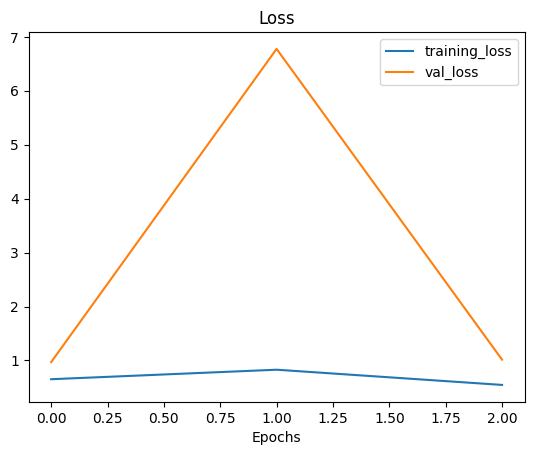

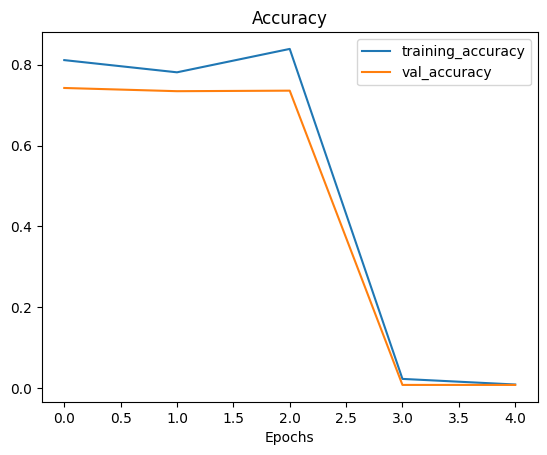

In [123]:
# plot loss curves
plot_loss_curves(hist_fine_tune_101_food)